_Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:_

_В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
Предложите метрики для оценки результатов последнего прошедшего тематического события в игре._

In [1]:
import pandas as pd

_Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:_

In [2]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-alen-kuznetsova/shared/problem1-reg_data.csv', sep=";")

In [3]:
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-alen-kuznetsova/shared/problem1-auth_data.csv', sep=";")

In [4]:
df1

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [5]:
df2

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2
...,...,...
9601008,1600874034,1110618
9601009,1600874086,1110619
9601010,1600874139,1110620
9601011,1600874191,1110621


In [6]:
df = df1.merge(df2)

In [7]:
df

,reg_ts,uid,auth_ts
0,911382223,1,911382223
1,932683089,2,932683089
2,932683089,2,932921206
3,932683089,2,933393015
4,932683089,2,933875379
...,...,...,...
9601008,1600874034,1110618,1600874034
9601009,1600874086,1110619,1600874086
9601010,1600874139,1110620,1600874139
9601011,1600874191,1110621,1600874191


__Retention Rate__ можно расчитать по формуле: ((кол-во пользователей, вернувшихся в продукт через определенное время)/(кол-во пользователей, начавших использовать продукт в начальный момент))*100%.

In [8]:
df['reg_ts'] = pd.to_datetime(df.reg_ts, unit='s') # переведем даты в более удобный формат для вычисления дней

In [9]:
df['auth_ts'] = pd.to_datetime(df.auth_ts, unit='s')

In [10]:
df

,reg_ts,uid,auth_ts
0,1998-11-18 09:43:43,1,1998-11-18 09:43:43
1,1999-07-22 22:38:09,2,1999-07-22 22:38:09
2,1999-07-22 22:38:09,2,1999-07-25 16:46:46
3,1999-07-22 22:38:09,2,1999-07-31 03:50:15
4,1999-07-22 22:38:09,2,1999-08-05 17:49:39
...,...,...,...
9601008,2020-09-23 15:13:54,1110618,2020-09-23 15:13:54
9601009,2020-09-23 15:14:46,1110619,2020-09-23 15:14:46
9601010,2020-09-23 15:15:39,1110620,2020-09-23 15:15:39
9601011,2020-09-23 15:16:31,1110621,2020-09-23 15:16:31


In [11]:
df.dtypes

reg_ts     datetime64[ns]
uid                 int64
auth_ts    datetime64[ns]
dtype: object

In [12]:
df_1 = df[(df['auth_ts'] - df['reg_ts']).dt.days == 1]
print(df_1) # посмотрим на количество игроков, которые заходили через день после регистрации

                     reg_ts      uid             auth_ts
2017    2003-12-13 21:36:48       45 2003-12-15 10:27:48
2062    2004-06-05 19:26:07       60 2004-06-07 18:51:54
2149    2005-04-23 05:26:52      102 2005-04-24 21:03:19
7715    2006-06-05 19:37:32      201 2006-06-07 15:13:28
10338   2006-08-06 22:14:30      223 2006-08-07 23:11:51
...                     ...      ...                 ...
9598744 2020-09-22 06:12:31  1108106 2020-09-23 13:14:55
9598783 2020-09-22 06:45:52  1108147 2020-09-23 14:03:17
9598809 2020-09-22 07:07:49  1108174 2020-09-23 07:15:56
9598938 2020-09-22 09:00:09  1108317 2020-09-23 12:36:19
9598955 2020-09-22 09:14:11  1108336 2020-09-23 12:31:38

[40202 rows x 3 columns]


In [13]:
df_1.reset_index()\
    .auth_ts.nunique() # выведем единым числом уникальное количество игроков

40191

In [14]:
df.reg_ts.nunique() # количество игроков, зарегестрировашихся на платформе

1000000

In [21]:
40191/1000000*100 # показатель retention за один день

4.0191

Мы посмотрели на retention rate в ручную для первого дня после регистрации для всего массива данных. Теперь создадим общую функцию с разбивкой по недельным когортам и рассмотрим показатель на определенном промежутке времени:

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
def calculate_and_plot_retention(df, start_date, end_date):
    """
    Функция для расчета недельного retention и построения тепловой карты.
    Возвращает:
    Тепловая карта retention по когортам.
    """
    
    # Фильтруем данные на промежутке времени
    df_filtered = df[(df['reg_ts'] >= start_date) & (df['reg_ts'] < end_date)]

    # Добавляем колонку "неделя регистрации"
    df_filtered['registration_week'] = df_filtered['reg_ts'].dt.to_period('W').apply(lambda r: r.start_time)

    # Рассчитываем разницу в неделях между регистрацией и авторизацией
    df_filtered['auth_week'] = df_filtered['auth_ts'].dt.to_period('W').apply(lambda r: r.start_time)
    df_filtered['week_diff'] = ((df_filtered['auth_ts'] - df_filtered['reg_ts']).dt.days // 7)

    # Убираем отрицательные значения
    df_filtered = df_filtered[df_filtered['week_diff'] >= 0]

    # Считаем retention по когортам
    retention = df_filtered.groupby(['registration_week', 'week_diff'])['uid'].nunique().unstack(fill_value=0)

    # Преобразуем количество пользователей в процент от общего числа зарегистрированных в каждую неделю
    retention_percent = retention.div(retention[0], axis=0) * 100

    # Строим тепловую карту
    plt.figure(figsize=(12, 8))
    sns.heatmap(retention_percent, annot=True, fmt=".1f", cmap="YlGnBu",vmin=0, vmax=20.0, cbar=True)
    plt.title(f'Retention Rate по недельным когортам ({start_date} — {end_date})')
    plt.ylabel('Неделя регистрации')
    plt.xlabel('Неделя после регистрации')
    plt.grid(False)
    plt.show()


Тепловая карта retention по недельным когортам:

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

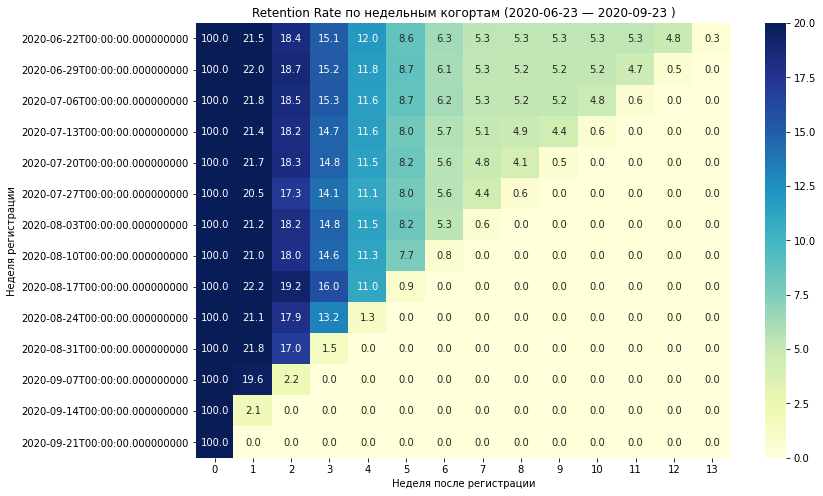

In [72]:
calculate_and_plot_retention(df, '2020-06-23', '2020-09-23 ')

Теперь разобьем данные на когорты по дням:

In [69]:
def calculate_and_plot_retention_daily(df, start_date, end_date):
    """
    Функция для расчета дневного retention и построения тепловой карты.
    Возвращает:
    Тепловая карта retention по дневным когортам.
    """
    
    # Фильтруем данные на промежутке времени
    df_filtered = df[(df['reg_ts'] >= start_date) & (df['reg_ts'] < end_date)]
    
    # Добавляем колонку "день регистрации"
    df_filtered['registration_day'] = df_filtered['reg_ts'].dt.date
    
    # Рассчитываем разницу в днях между регистрацией и авторизацией
    df_filtered['auth_day'] = df_filtered['auth_ts'].dt.date
    df_filtered['day_diff'] = (df_filtered['auth_day'] - df_filtered['registration_day']).dt.days

    # Убираем отрицательные значения
    df_filtered = df_filtered[df_filtered['day_diff'] >= 0]
    
    # Считаем retention по когортам
    retention = df_filtered.groupby(['registration_day', 'day_diff'])['uid'].nunique().unstack(fill_value=0)
    
    # Преобразуем количество пользователей в процент от общего числа зарегистрированных в каждый день
    retention_percent = retention.div(retention[0], axis=0) * 100
    
    # Строим тепловую карту
    plt.figure(figsize=(14, 10))
    sns.heatmap(retention_percent, annot=True, fmt=".1f", cmap="YlGnBu", vmin=0.1, vmax=7.0, cbar=True)
    plt.title(f'Retention Rate по дневным когортам ({start_date} — {end_date})')
    plt.ylabel('День регистрации')
    plt.xlabel('День после регистрации')
    plt.show()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

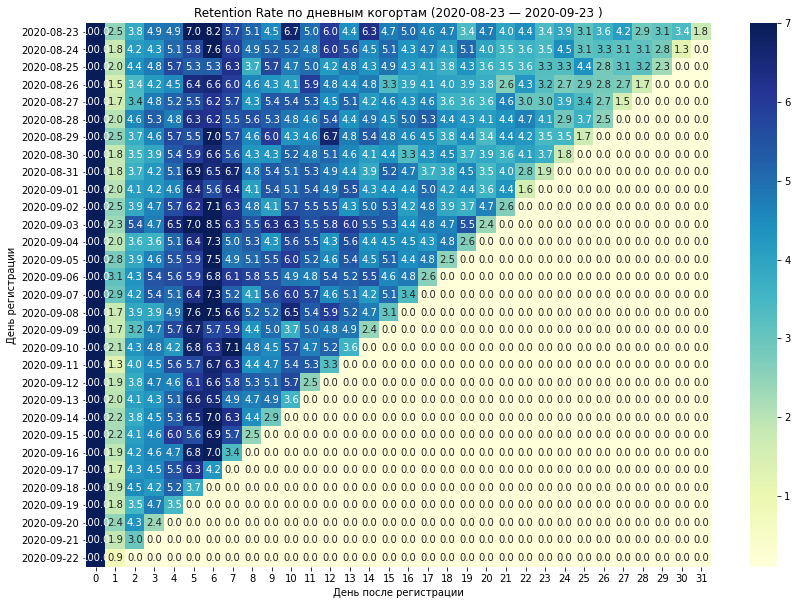

In [70]:
calculate_and_plot_retention_daily(df, '2020-08-23', '2020-09-23 ')

_Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667._

_Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?_

In [47]:
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-alen-kuznetsova/Проект_1_Задание_2.csv', sep=";")

In [48]:
df3

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [49]:
df3.dtypes

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [50]:
all_revenue = df3.groupby('testgroup')\
    .agg({'revenue':'sum'})
print(all_revenue) # общий доход для двух групп

           revenue
testgroup         
a          5136189
b          5421603


__ARPU (Average Revenue Per User)__ — это средний доход на одного пользователя. Рассчитывается по формуле: общий доход за определенный период/количество пользователей за тот же период.
Из условия нам ясно, что тестовая группа (b) имеет показатель на 5% выше, чем контрольная (a).

In [72]:
df3.user_id.nunique()

404770

In [73]:
all_users_by_group = df3.groupby('testgroup')\
    .agg({'user_id':'count'}) # количество всех пользователей по группам
print(all_users_by_group)

           user_id
testgroup         
a           202103
b           202667


In [74]:
ARPU_control = all_revenue.query('testgroup == "a"').revenue/all_users_by_group.query('testgroup == "a"').user_id
print(f"ARPU для контрольной группы: {ARPU_control.a}")

ARPU для контрольной группы: 25.413719736965806


In [75]:
ARPU_test = all_revenue.query('testgroup == "b"').revenue/all_users_by_group.query('testgroup == "b"').user_id
print(f"ARPU для тестовой группы: {ARPU_test.b}")

ARPU для тестовой группы: 26.75128659327863


Можно посмотреть на __ARPPU (Average Revenue Per Paying User)__ - также средний доход, только при его расчете учитываются исклютельно платящие пользователи.

In [76]:
pay_users = df3.query('revenue != 0')\
    .groupby('testgroup')\
    .agg({'user_id':'count'}) # количество платящих пользователей для каждой группы
print(pay_users)

           user_id
testgroup         
a             1928
b             1805


In [77]:
ARPPU_control = all_revenue.query('testgroup == "a"').revenue/pay_users.query('testgroup == "a"').user_id
print(f"ARPPU для контрольной группы: {ARPPU_control.a}")

ARPPU для контрольной группы: 2663.9984439834025


In [78]:
ARPPU_test = all_revenue.query('testgroup == "b"').revenue/pay_users.query('testgroup == "b"').user_id
print(f"ARPPU для тестовой группы: {ARPPU_test.b}")

ARPPU для тестовой группы: 3003.6581717451522


In [79]:
(3003.658172-2663.998444)/2663.998444*100

12.749997236860253

ARPPU в тестовой группе, как и ARPU, также выше, чем в контрольной, на 12 процентов.

Посмотрим на __conversion rate__ (процент пользователей, который сделали хотя бы одну покупку) среди пользователей двух групп:

In [80]:
conversion_rate_control = pay_users.query('testgroup == "a"').user_id/all_users_by_group.query('testgroup == "a"').user_id
print(f"Конверсия для контрольной группы: {conversion_rate_control.a}")

Конверсия для контрольной группы: 0.009539690157988749


In [81]:
conversion_rate_test = pay_users.query('testgroup == "b"').user_id/all_users_by_group.query('testgroup == "b"').user_id
print((f"Конверсия для тестовой группы: {conversion_rate_test.b}"))

Конверсия для тестовой группы: 0.008906235351586593


In [82]:
(0.00954-0.008906)/0.008906*100

7.118796317089593

Конверсия пользователей в контрольной группе выше, чем в тестовой на 7 процентов, что может означать то, что в тестовой группе клиенты менее охотно соглашались на оплату различных услуг.

In [83]:
df3.groupby('testgroup').describe()

user_id                                                         \
              count           mean            std  min       25%       50%   
testgroup                                                                    
a          202103.0  202555.909843  116802.329266  2.0  101502.5  202988.0   
b          202667.0  202215.564389  116891.926690  1.0  100855.5  201821.0   

                                revenue                                        \
                75%       max     count       mean         std  min  25%  50%   
testgroup                                                                       
a          303559.0  404769.0  202103.0  25.413720  920.768137  0.0  0.0  0.0   
b          303602.5  404770.0  202667.0  26.751287  287.324162  0.0  0.0  0.0   

                         
           75%      max  
testgroup                
a          0.0  37433.0  
b          0.0   4000.0

In [84]:
a_group = df3.query('testgroup == "a"')

In [85]:
b_group = df3.query('testgroup == "b"')

In [93]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [87]:
a_group.groupby('revenue')\
    .agg({'user_id':'count'})\
    .sort_values('user_id', ascending=False)\
    .reset_index()\
    .drop(0)

# в этой таблице мы может посмотреть, какие суммы чаще всего вносили пользователи. Для контрольной группы.

,revenue,user_id
1,310,18
2,206,18
3,397,17
4,265,17
5,224,17
...,...,...
264,37335,1
265,37336,1
266,37337,1
267,37339,1


In [88]:
b_group.groupby('revenue')\
    .agg({'user_id':'count'})\
    .sort_values('user_id', ascending=False)\
    .reset_index()\
    .drop(0)

# для тестовой группы

,revenue,user_id
1,2003,6
2,3359,5
3,2418,4
4,3479,4
5,3877,4
...,...,...
1204,3084,1
1205,3085,1
1206,2428,1
1207,2426,1


Мы видим достаточно различную величину оплат для двух групп. Это может поставить под сомнение корректность сплитования групп.

Проверим нормальность распределения данных в каждой группе с помощью теста Агостино-Пирсона:

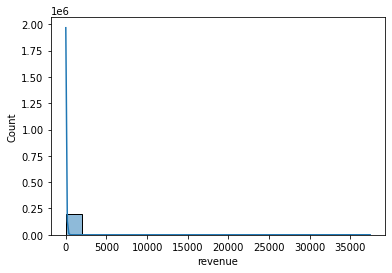

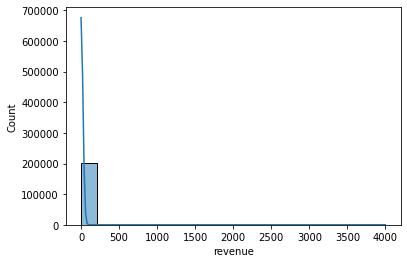

Agostino-Pearson Test Statistic: 585152.7312728433
P-value: 0.0
Agostino-Pearson Test Statistic: 326622.39540856465
P-value: 0.0
Распределение данных в контрольной группе ненормально (отклоняем нулевую гипотезу)
Распределение данных в тестовой группе ненормально (отклоняем нулевую гипотезу)


In [89]:
sns.histplot(a_group.revenue, kde=True)
plt.show()
sns.histplot(b_group.revenue, kde=True)
plt.show()

stat_a, a = stats.normaltest(a_group.revenue)
stat_b, b = stats.normaltest(b_group.revenue)

print(f"Agostino-Pearson Test Statistic: {stat_a}")
print(f"P-value: {a}")
print(f"Agostino-Pearson Test Statistic: {stat_b}")
print(f"P-value: {b}")

# H0 - распределение нормальное
# H1 - распределение ненормальное

alpha = 0.05
if a > alpha:
    print("Распределение данных в контрольной группе нормально (не отклоняем нулевую гипотезу)")
else:
    print("Распределение данных в контрольной группе ненормально (отклоняем нулевую гипотезу)")
    
if b > alpha:
    print("Распределение данных в тестовой группе нормально (не отклоняем нулевую гипотезу)")
else:
    print("Распределение данных в тестовой группе ненормально (отклоняем нулевую гипотезу)")
    

Проведем хи-квадрат пирсона для конверсии пользователей, чтобы понять, являются ли эти различия в группах значимыми:

__H0 - CR в группах значимо не отличаются;
H1 - CR в группах имеют значимые отличия__

In [90]:
# создадим ТАБЛИЦУ СОПРЯЖЕННОСТИ

df3['conversion'] = df3['revenue'].apply(lambda x: 1 if x > 0 else 0)

table = pd.crosstab(df3['testgroup'], df3['conversion'])

print("Таблица сопряженности:")
print(table)

Таблица сопряженности:
conversion       0     1
testgroup               
a           200175  1928
b           200862  1805


In [91]:
# теперь проведем тест ХИ-КВАДРАТ ПИРСОНА

chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"\nChi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=table.index, columns=table.columns))

# Интерпретация
alpha = 0.05
if p < alpha:
    print("Существуют статистически значимые различия между группами (отклоняем нулевую гипотезу).")
else:
    print("Нет статистически значимых различий между группами (не отклоняем нулевую гипотезу).")


Chi2 Statistic: 4.37
P-value: 0.0365
Degrees of Freedom: 1
Expected Frequencies:
conversion              0            1
testgroup                             
a           200239.100751  1863.899249
b           200797.899249  1869.100751
Существуют статистически значимые различия между группами (отклоняем нулевую гипотезу).


Теперь проведем метод бутстрап для проверки значимых различий между ARPU в двух группах:

__H0 - ARPU в группах значимо не отличаются;
H1 - ARPU в группах имеют значимые отличия__

In [94]:
def bootstrap_ARPU(df3, n_iterations=1000):
    ARPU_control_group = []
    ARPU_test_group = []
    ARPU_diff = []

    for _ in range(n_iterations):
        sample_control = df3[df3['testgroup'] == 'a'].sample(n=len(df3[df3['testgroup'] == 'a']), replace=True)
        sample_test = df3[df3['testgroup'] == 'b'].sample(n=len(df3[df3['testgroup'] == 'b']), replace=True)

        ARPU_control = sample_control['revenue'].mean()
        ARPU_test = sample_test['revenue'].mean()

        ARPU_control_group.append(ARPU_control)
        ARPU_test_group.append(ARPU_test)
        ARPU_diff.append(ARPU_test - ARPU_control)  # Разница между ARPU тестовой и контрольной группы

    return np.array(ARPU_control_group), np.array(ARPU_test_group), np.array(ARPU_diff)

n_iterations = 1000

# Выполнение бутстрапа
ARPU_control_group, ARPU_test_group, ARPU_diff = bootstrap_ARPU(df3)

# Расчет доверительных интервалов
confidence_interval_control = np.percentile(ARPU_control_group, [2.5, 97.5])
confidence_interval_test = np.percentile(ARPU_test_group, [2.5, 97.5])
confidence_interval_diff = np.percentile(ARPU_diff, [2.5, 97.5])

# Расчет p-value
p_value = (np.sum(ARPU_diff <= 0) / n_iterations) * 2

print(f"Доверительный интервал ARPU для контрольной группы: {confidence_interval_control}")
print(f"Доверительный интервал ARPU для тестовой группы: {confidence_interval_test}")
print(f"Доверительный интервал разницы ARPU: {confidence_interval_diff}")
print(f"p-значение: {p_value}")

Доверительный интервал ARPU для контрольной группы: [21.6367497  29.52367122]
Доверительный интервал ARPU для тестовой группы: [25.44786287 27.93855894]
Доверительный интервал разницы ARPU: [-2.91502323  5.27878186]
p-значение: 0.512


P-значение значительное выше 0.05, значит, мы можем сделать вывод, что значимых различий между показателями ARPU нет (принимаем нулевую гипотезу).

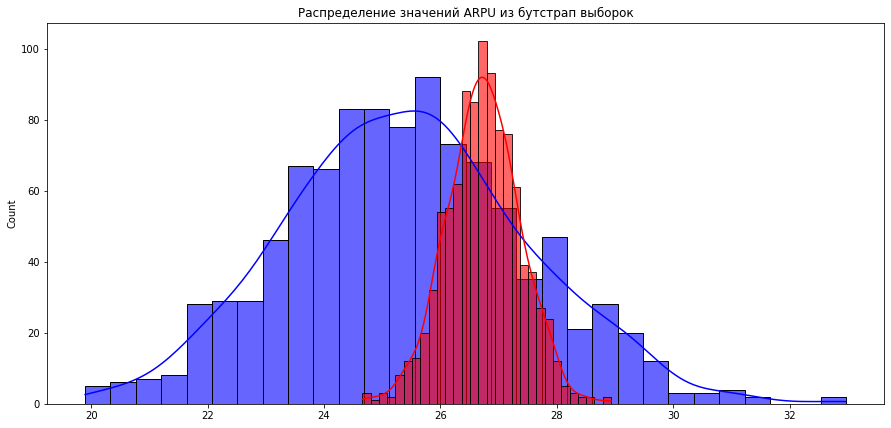

In [103]:
plt.figure(figsize=(15, 7))
plt.title('Распределение значений ARPU из бутстрап выборок')
sns.histplot(ARPU_control_group, kde=True, color='blue', label='Control Group', bins=30, alpha=0.6)
sns.histplot(ARPU_test_group, kde=True, color='red', label='Test Group', bins=30, alpha=0.6)
plt.show()

Теперь проведем такой же тест, но для ARPPU:

__H0 - ARPPU в группах значимо не отличаются;
H1 - ARPPU в группах имеют значимые отличия__

In [95]:
def bootstrap_ARPPU(df3, n_iterations=1000):
    ARPPU_control_group = []
    ARPPU_test_group = []
    ARPPU_diff = []

    for _ in range(n_iterations):
        sample_control = df3[(df3['testgroup'] == 'a') & (df3['revenue'] > 0)].sample(
            n=len(df3[(df3['testgroup'] == 'a') & (df3['revenue'] > 0)]), 
            replace=True
        )
        sample_test = df3[(df3['testgroup'] == 'b') & (df3['revenue'] > 0)].sample(
            n=len(df3[(df3['testgroup'] == 'b') & (df3['revenue'] > 0)]), 
            replace=True
        )

        ARPPU_control = sample_control['revenue'].mean()
        ARPPU_test = sample_test['revenue'].mean()

        ARPPU_control_group.append(ARPPU_control)
        ARPPU_test_group.append(ARPPU_test)
        ARPPU_diff.append(ARPPU_test - ARPPU_control)  # Разница между ARPPU тестовой и контрольной группы

    return np.array(ARPPU_control_group), np.array(ARPPU_test_group), np.array(ARPPU_diff)

n_iterations = 1000

# Выполнение бутстрапа
ARPPU_control_group, ARPPU_test_group, ARPPU_diff = bootstrap_ARPPU(df3)

# Расчет доверительных интервалов
confidence_interval_control = np.percentile(ARPPU_control_group, [2.5, 97.5])
confidence_interval_test = np.percentile(ARPPU_test_group, [2.5, 97.5])
confidence_interval_diff = np.percentile(ARPPU_diff, [2.5, 97.5])

# Расчет p-value
p_value = (np.sum(ARPPU_diff <= 0) / n_iterations) * 2

print(f"Доверительный интервал ARPPU для контрольной группы: {confidence_interval_control}")
print(f"Доверительный интервал ARPPU для тестовой группы: {confidence_interval_test}")
print(f"Доверительный интервал разницы ARPPU: {confidence_interval_diff}")
print(f"p-значение: {p_value}")

Доверительный интервал ARPPU для контрольной группы: [2299.52442946 3067.37118776]
Доверительный интервал ARPPU для тестовой группы: [2976.82797784 3029.08439058]
Доверительный интервал разницы ARPPU: [-45.44367361 702.03906607]
p-значение: 0.088


Точно так же, как и в предыдущем опыте, принимаем нулевую гипотезу. Значимых различий нет.

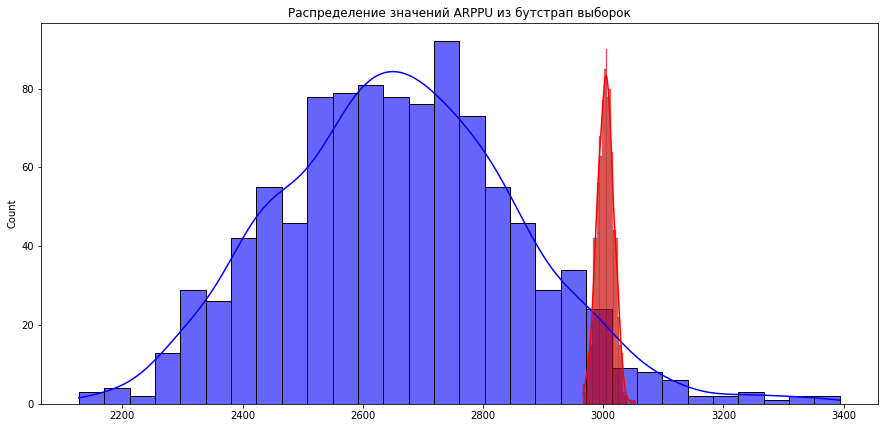

In [114]:
plt.figure(figsize=(15, 7))
plt.title('Распределение значений ARPPU из бутстрап выборок')
sns.histplot(ARPPU_control_group, kde=True, color='blue', label='Control Group', bins=30, alpha=0.6)
sns.histplot(ARPPU_test_group, kde=True, color='red', label='Test Group', bins=30, alpha=0.6)
plt.show()

В результате тестов мы имеем лишь значимые различия CR между группами. В тестовой группе поступление платежей значимо уменьшилось. Но прежде, чем задуматься о внедрении новых предложений, я бы рекомендовала провести новый сбор данных, возможно на более продолжительном промежутке, потому что в этом наборе явно наблюдаются несопоставимые сегменты пользователей, что ставит под сомнение значимость проведенных тестов.


_В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?_

_Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?_

Если под "определенный период времени" понимается какое-то количество дней, то:

Мы можем посмотреть на такие _метрики роста_, как:  __DAU (dayly active users)__ - количество уникальных пользователей, которые взаимодействуют с приложением каждый день, с помощью этой метрики мы увидим, увеличилось ли количество пользователей за день на период события;
На __churn rate__ - процент пользователей, которые прекратили использовать игру за определенный период, что необхдимо интерпретировать аккуратно, опираясь на данные предыдущих событий и игры в целом.  

Взглянем  на _метрики вовлеченности_: __session lenght__ - средняя продолжительность одной игровой сессии. Увидим, стали ли пользователи больше времени проводить в игре; 
__session per user__ - среднее количество сессий на одного пользователя за день, неделю или месяц. Увидим частоту пользования приложением, что предполагается, она должна увеличиться.

_Метрики производительности и успеха событий_ (эти метрики помогают оценить, насколько успешным было событие в контексте выполнения целей и задач):
__level comletion rate__ - процент пользователей, завершивших конкретный уровень или часть игры (чтобы увидеть количество пользователей и их прогресс. Совсем малое число будет знаком того, что пользователям дается слишком трудно или неинтересно такое прохождение и может спугнуть их в целом);
__level drop-off rate__ - процент пользователей, прекративших играть на определенном уровне (большое количество на уровнях события с новой механикой будет знаком того, что новая механика спугнула процент пользователей, но сравнивать стоит с предыдщими показателями, чтобы не перепутать с естественным оттоком). 